Importovanje biblioteka

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Dropout, ReLU
from tensorflow.keras.optimizers import Adam




Ucitavanje dataseta

In [2]:
main_folder = "Data/training_data"

# Rekurzivno prolazi kroz subfoldere i ucitava slike (mi smo imali vise podfoldera)
image_paths = []
for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

# ucitavanje i promena dimenzija fotografije na 128x128
def load_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((128, 128))
        return np.array(img) 
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

y = pd.DataFrame(image_paths, columns=['image_path'])

y['image_data'] = y['image_path'].apply(load_image)

# filtriranje slika gde je ucitavanje neuspesno
y = y[y['image_data'].notnull()]



Prikazivanje jedne učitane fotografije

In [3]:
first_image_array = y['image_data'].iloc[0]
first_image = Image.fromarray(first_image_array)
first_image.show()

Kreiranje crno belih fotografija (input)

In [4]:
# funkija za ucitavanje i konvertovanje fotografija u crno-bele verzije
def load_and_convert_to_bw(image_path):
    try:
        img = Image.open(image_path).convert("L") 
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

X = pd.DataFrame(image_paths, columns=['image_path'])

X['bw_image_data'] = X['image_path'].apply(load_and_convert_to_bw)

X = X[X['bw_image_data'].notnull()]

Prikazivanje jedne crno-bele fotografije

In [5]:
first_image_array_L = X['bw_image_data'].iloc[0]

first_image_L = Image.fromarray(first_image_array_L)

first_image_L.show()

Čuvanje crno-belih fotografija u zaseban folder

In [6]:
bw_image_folder = "Data/training_data_bw"

os.makedirs(bw_image_folder, exist_ok=True)

def convert_and_save_bw(image_path, save_folder):
    try:
        img = Image.open(image_path).convert("L") 
        img = img.resize((128, 128))  
        
        filename = os.path.basename(image_path)
        name, ext = os.path.splitext(filename)
        new_filename = f"{name}_bw{ext}"
        
        save_path = os.path.join(save_folder, new_filename)
        img.save(save_path)
        print(f"Saved BW image to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

for image_path in X['image_path']:
    convert_and_save_bw(image_path, bw_image_folder)

Saved BW image to: Data/training_data_bw\10_bw.jpg
Saved BW image to: Data/training_data_bw\12_bw.jpg
Saved BW image to: Data/training_data_bw\13_bw.jpg
Saved BW image to: Data/training_data_bw\15_bw.jpg
Saved BW image to: Data/training_data_bw\16_bw.jpg
Saved BW image to: Data/training_data_bw\17_bw.jpg
Saved BW image to: Data/training_data_bw\18_bw.jpg
Saved BW image to: Data/training_data_bw\19_bw.jpg
Saved BW image to: Data/training_data_bw\20_bw.jpg
Saved BW image to: Data/training_data_bw\21_bw.jpg
Saved BW image to: Data/training_data_bw\23_bw.jpg
Saved BW image to: Data/training_data_bw\24_bw.jpg
Saved BW image to: Data/training_data_bw\26_bw.jpg
Saved BW image to: Data/training_data_bw\27_bw.jpg
Saved BW image to: Data/training_data_bw\32_bw.jpg
Saved BW image to: Data/training_data_bw\34_bw.jpg
Saved BW image to: Data/training_data_bw\35_bw.jpg
Saved BW image to: Data/training_data_bw\4_bw.jpg
Saved BW image to: Data/training_data_bw\41_bw.jpg
Saved BW image to: Data/training

Učitavanje Test Set-a

In [7]:
main_folder = "Data/test_data"

image_paths = []
for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

def load_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

y_test = pd.DataFrame(image_paths, columns=['image_path'])

y_test['image_data'] = y_test['image_path'].apply(load_image)

y_test = y_test[y_test['image_data'].notnull()]

Prikaz jedne fotografije iz test set-a

In [8]:
first_image_array = y_test['image_data'].iloc[0]
first_image = Image.fromarray(first_image_array)
first_image.show()

Konvertovanje fotografija iz Test Set-a u crno-bele verzije

In [9]:
def load_and_convert_to_bw(image_path):
    try:
        img = Image.open(image_path).convert("L")  
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

X_test = pd.DataFrame(image_paths, columns=['image_path'])

X_test['bw_image_data'] = X_test['image_path'].apply(load_and_convert_to_bw)

X_test = X_test[X_test['bw_image_data'].notnull()]

In [10]:
first_image_array_L = X_test['bw_image_data'].iloc[0]

first_image_L = Image.fromarray(first_image_array_L)

first_image_L.show()

In [11]:
bw_image_folder = "Data/test_data_bw"

os.makedirs(bw_image_folder, exist_ok=True)  

def convert_and_save_bw(image_path, save_folder):
    try:
        img = Image.open(image_path).convert("L")  
        img = img.resize((128, 128))  
        
        filename = os.path.basename(image_path)
        name, ext = os.path.splitext(filename)
        new_filename = f"{name}_bw{ext}"
        
        save_path = os.path.join(save_folder, new_filename)
        img.save(save_path)
        print(f"Saved BW image to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

for image_path in X_test['image_path']:
    convert_and_save_bw(image_path, bw_image_folder)

Saved BW image to: Data/test_data_bw\20056_bw.jpg
Saved BW image to: Data/test_data_bw\20057_bw.jpg
Saved BW image to: Data/test_data_bw\20058_bw.jpg
Saved BW image to: Data/test_data_bw\20059_bw.jpg
Saved BW image to: Data/test_data_bw\20060_bw.jpg
Saved BW image to: Data/test_data_bw\20061_bw.jpg
Saved BW image to: Data/test_data_bw\20062_bw.jpg
Saved BW image to: Data/test_data_bw\20064_bw.jpg
Saved BW image to: Data/test_data_bw\20066_bw.jpg
Saved BW image to: Data/test_data_bw\20067_bw.jpg
Saved BW image to: Data/test_data_bw\20068_bw.jpg
Saved BW image to: Data/test_data_bw\20069_bw.jpg
Saved BW image to: Data/test_data_bw\20070_bw.jpg
Saved BW image to: Data/test_data_bw\20071_bw.jpg
Saved BW image to: Data/test_data_bw\20072_bw.jpg
Saved BW image to: Data/test_data_bw\20073_bw.jpg
Saved BW image to: Data/test_data_bw\20074_bw.jpg
Saved BW image to: Data/test_data_bw\20075_bw.jpg
Saved BW image to: Data/test_data_bw\20076_bw.jpg
Saved BW image to: Data/test_data_bw\20077_bw.jpg


In [12]:
X_train_np = np.stack(X['bw_image_data'].values[:]).astype('float32') / 255.0
y_train_np = np.stack(y['image_data'].values[:]).astype('float32') / 255.0
X_test_np = np.stack(X_test['bw_image_data'].values[:]).astype('float32') / 255.0
y_test_np = np.stack(y_test['image_data'].values[:]).astype('float32') / 255.0

if X_train_np.ndim == 3:
    X_train_np = X_train_np[..., np.newaxis]
if X_test_np.ndim == 3:
    X_test_np = X_test_np[..., np.newaxis]

Encoder - Decoder Model 

In [13]:


def encoder_decoder(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    p1 = MaxPooling2D((2, 2))(x1)
    p1 = Dropout(0.25)(p1)

    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    x2 = BatchNormalization()(x2)
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    p2 = MaxPooling2D((2, 2))(x2)
    p2 = Dropout(0.25)(p2)

    x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    x3 = BatchNormalization()(x3)
    x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
    x3 = BatchNormalization()(x3)
    p3 = MaxPooling2D((2, 2))(x3)
    p3 = Dropout(0.25)(p3)

    b = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    b = BatchNormalization()(b)
    b = Dropout(0.4)(b)

    # Decoder
    u3 = UpSampling2D((2, 2))(b)
    u3 = Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    u3 = BatchNormalization()(u3)
    u3 = Dropout(0.25)(u3)

    u2 = UpSampling2D((2, 2))(u3)
    u2 = Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = BatchNormalization()(u2)
    u2 = Dropout(0.25)(u2)

    u1 = UpSampling2D((2, 2))(u2)
    u1 = Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    u1 = BatchNormalization()(u1)
    u1 = Dropout(0.25)(u1)

    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(u1)

    model = Model(inputs, outputs)
    return model

In [14]:
model = encoder_decoder(input_shape=(128, 128, 1))  

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_encoder_decoder_model.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=20,
    batch_size=128,
    callbacks=callbacks
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.1550 - mae: 0.3206 - val_loss: 0.0767 - val_mae: 0.2382
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0908 - mae: 0.2344 - val_loss: 0.0761 - val_mae: 0.2373
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0653 - mae: 0.1953 - val_loss: 0.0756 - val_mae: 0.2366
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0559 - mae: 0.1798 - val_loss: 0.0735 - val_mae: 0.2334
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0490 - mae: 0.1667 - val_loss: 0.0707 - val_mae: 0.2286
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0444 - mae: 0.1575 - val_loss: 0.0673 - val_mae: 0.2224
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0409 - mae: 0.1517 - val_loss: 0.0633 - val_mae: 0.2132
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0378 - mae: 0.1468 - val_loss: 0.0610 - val_mae: 0.2065
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0353 - mae: 0.1423 - val_loss: 0.0598

Čuvanje modela, predvidjanje i čuvanje fotografija u zasebnom folderu

In [15]:
model.save('colorization_model_encoder_decoder.h5')  

output_folder = "colorized_images_results_encoder_decoder"
os.makedirs(output_folder, exist_ok=True)


grayscale_inputs = X_test_np[:]
predicted_rgbs = model.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved 31 grayscale and colorized images to 'colorized_images_results_encoder_decoder'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


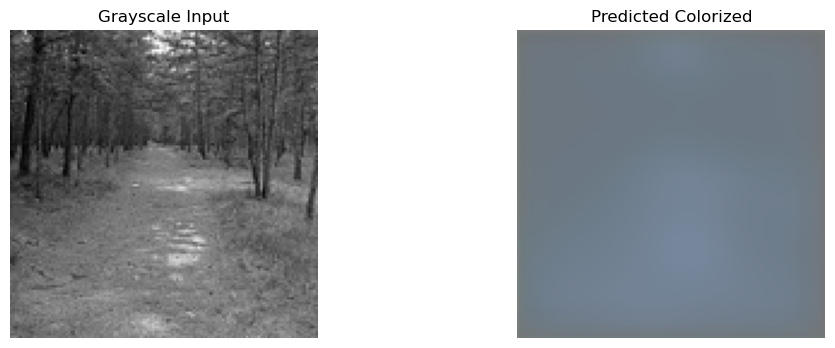

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


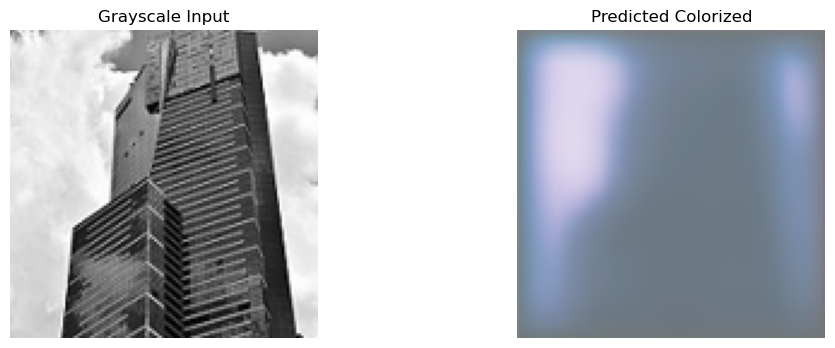

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


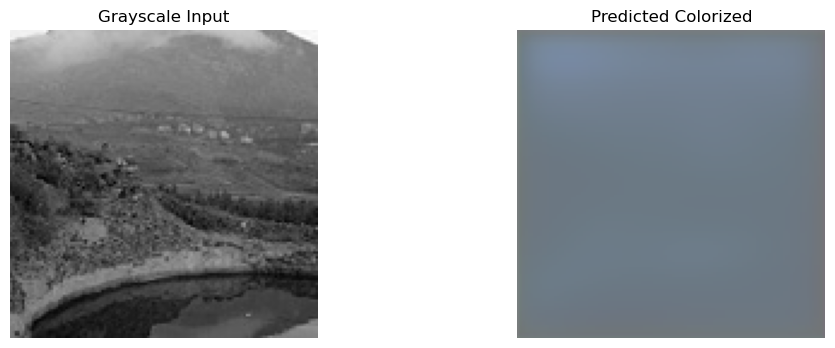

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


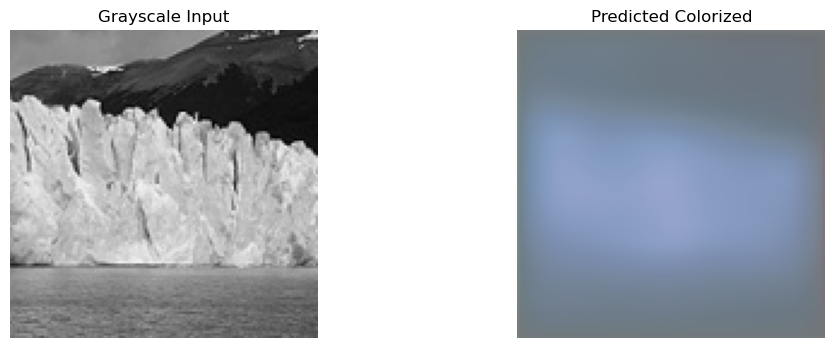

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


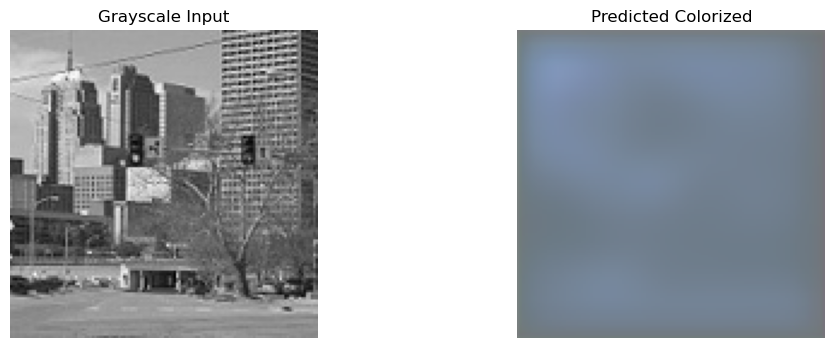

In [16]:

# Prikaz prvih 5 slika
num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

CNN

In [17]:
import tensorflow as tf

def cnn(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    outputs = Conv2D(3, (1, 1), activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model_cnn = cnn(input_shape=(128, 128, 1))
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)

model_cnn.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 256)    │             

 Total params: 6,242,627 (23.81 MB)

 Trainable params: 6,237,891 (23.80 MB)

 Non-trainable params: 4,736 (18.50 KB)

In [18]:
cnn_history = model_cnn.fit(
    X_train_np,                
    y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=30,                 
    batch_size=64,             
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            "cnn_colorization_best.keras",   
            monitor="val_loss",
            save_best_only=True
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=8,
            restore_best_weights=True
        )
    ],
    verbose=1
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.1164 - mae: 0.2792 - val_loss: 0.0767 - val_mae: 0.2382
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0647 - mae: 0.1975 - val_loss: 0.0765 - val_mae: 0.2380
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0437 - mae: 0.1587 - val_loss: 0.0765 - val_mae: 0.2382
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0378 - mae: 0.1463 - val_loss: 0.0760 - val_mae: 0.2372
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0291 - mae: 0.1278 - val_loss: 0.0754 - val_mae: 0.2360
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0282 - mae: 0.1256 - val_loss: 0.0752 - val_mae: 0.2355
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0258 - mae: 0.1196 - val_loss: 0.0761 - val_mae: 0.2363
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0249 - mae: 0.1168 - val_loss: 0.0773 - val_mae: 0.2378
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0242 - mae: 0.1152 - val_loss: 0.0782

Čuvanje modela, predvidjanje i čuvanje fotografija u zasebnom folderu

In [19]:
model_cnn.save('colorization_model_cnn.h5')  

output_folder = "colorized_images_results_u_net"
os.makedirs(output_folder, exist_ok=True)

grayscale_inputs = X_test_np[:]
predicted_rgbs = model_cnn.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved 31 grayscale and colorized images to 'colorized_images_results_u_net'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


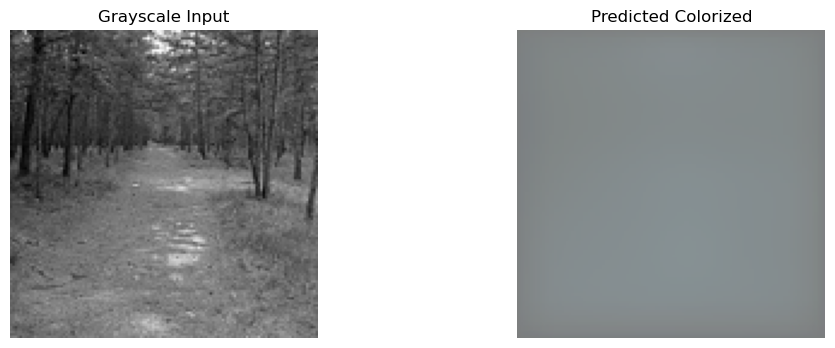

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


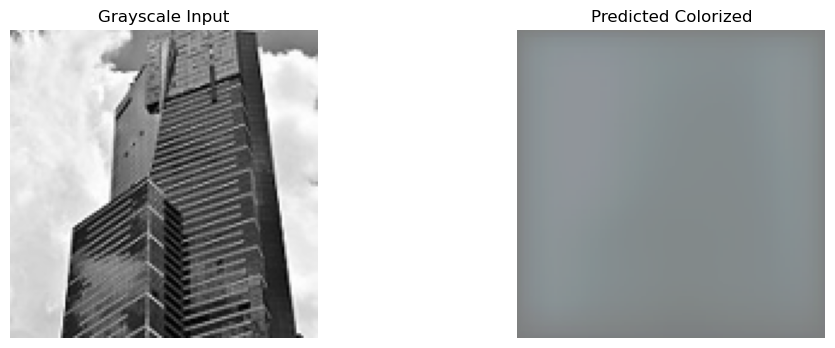

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


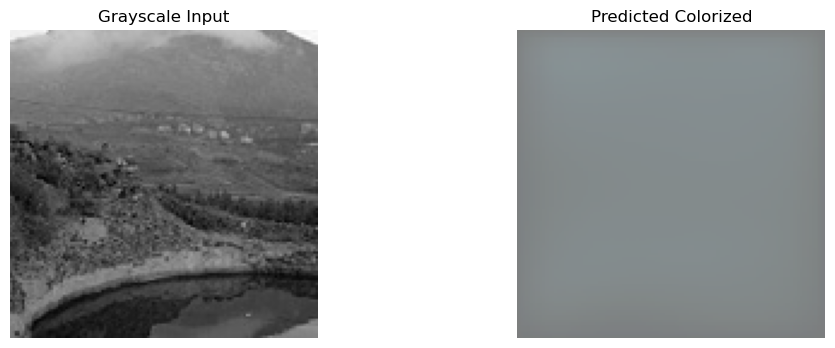

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


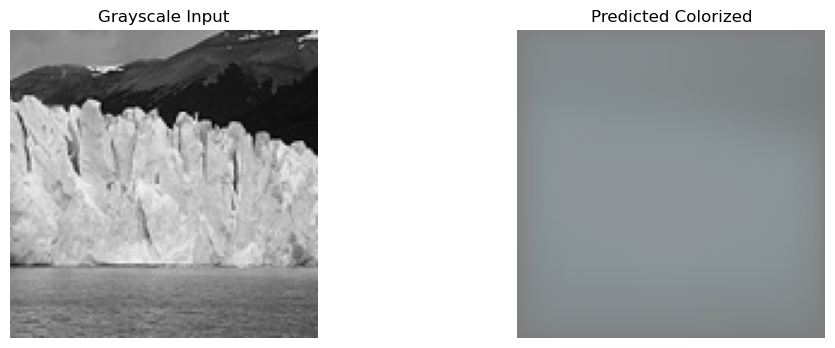

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


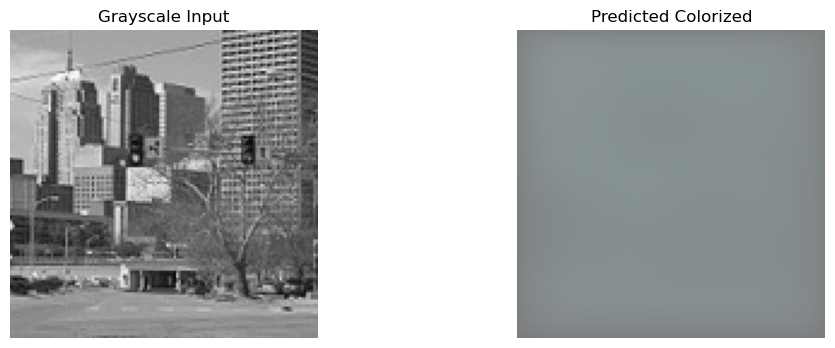

In [20]:
import matplotlib.pyplot as plt

num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model_cnn.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

U NET

In [21]:
import tensorflow as tf

def u_net(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)
    conv1 = Conv2D(64, (3, 3), padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.1)(pool1)

    conv2 = Conv2D(128, (3, 3), padding="same")(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)
    conv2 = Conv2D(128, (3, 3), padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.1)(pool2)

    conv3 = Conv2D(256, (3, 3), padding="same")(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)
    conv3 = Conv2D(256, (3, 3), padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.2)(pool3)

    conv4 = Conv2D(512, (3, 3), padding="same")(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = ReLU()(conv4)
    conv4 = Conv2D(512, (3, 3), padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = ReLU()(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.2)(pool4)

    conv5 = Conv2D(1024, (3, 3), padding="same")(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = ReLU()(conv5)
    conv5 = Conv2D(1024, (3, 3), padding="same")(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = ReLU()(conv5)
    conv5 = Dropout(0.3)(conv5)

    # Decoder
    up6 = UpSampling2D((2, 2))(conv5)
    up6 = Conv2D(512, (3, 3), padding="same")(up6)
    up6 = BatchNormalization()(up6)
    up6 = ReLU()(up6)
    up6 = Dropout(0.2)(up6)
    merge6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding="same")(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ReLU()(conv6)
    conv6 = Conv2D(512, (3, 3), padding="same")(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ReLU()(conv6)

    up7 = UpSampling2D((2, 2))(conv6)
    up7 = Conv2D(256, (3, 3), padding="same")(up7)
    up7 = BatchNormalization()(up7)
    up7 = ReLU()(up7)
    up7 = Dropout(0.2)(up7)
    merge7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding="same")(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ReLU()(conv7)
    conv7 = Conv2D(256, (3, 3), padding="same")(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ReLU()(conv7)

    up8 = UpSampling2D((2, 2))(conv7)
    up8 = Conv2D(128, (3, 3), padding="same")(up8)
    up8 = BatchNormalization()(up8)
    up8 = ReLU()(up8)
    up8 = Dropout(0.1)(up8)
    merge8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding="same")(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ReLU()(conv8)
    conv8 = Conv2D(128, (3, 3), padding="same")(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ReLU()(conv8)

    up9 = UpSampling2D((2, 2))(conv8)
    up9 = Conv2D(64, (3, 3), padding="same")(up9)
    up9 = BatchNormalization()(up9)
    up9 = ReLU()(up9)
    up9 = Dropout(0.1)(up9)
    merge9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding="same")(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ReLU()(conv9)
    conv9 = Conv2D(64, (3, 3), padding="same")(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ReLU()(conv9)

    output = Conv2D(3, (1, 1), activation="sigmoid")(conv9)

    model = Model(inputs=inputs, outputs=output)
    return model

model_u_net = u_net(input_shape=(128, 128, 1))
model_u_net.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)

model_u_net.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     36,928 │ re_lu_11[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ re_lu_12[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64, 64,    │          0 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │     73,856 │ dropout_7[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │    147,584 │ re_lu_13[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_26[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ re_lu_14[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_7[

 Total params: 34,539,715 (131.76 MB)

 Trainable params: 34,526,019 (131.71 MB)

 Non-trainable params: 13,696 (53.50 KB)

In [22]:
history = model_u_net.fit(
    X_train_np,                
    y_train_np,
    validation_data=(X_test_np, y_test_np),  
    epochs=30,                 
    batch_size=64,             
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("u_net_colorization_best.keras", monitor='val_loss', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    ],
    verbose=1             
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - loss: 0.1172 - mae: 0.2868 - val_loss: 0.0765 - val_mae: 0.2380
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0544 - mae: 0.1825 - val_loss: 0.0761 - val_mae: 0.2375
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0330 - mae: 0.1377 - val_loss: 0.0756 - val_mae: 0.2367
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0235 - mae: 0.1160 - val_loss: 0.0749 - val_mae: 0.2356
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0185 - mae: 0.1015 - val_loss: 0.0741 - val_mae: 0.2343
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0153 - mae: 0.0908 - val_loss: 0.0732 - val_mae: 0.2327
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0132 - mae: 0.0834 - val_loss: 0.0727 - val_mae: 0.2318
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0115 - mae: 0.0774 - val_loss: 0.0738 - val_mae: 0.2331
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0103 - mae: 0.0731 - val_

In [23]:
model_u_net.save('colorization_model_u_net.h5') 

output_folder = "colorized_images_results_u_net"
os.makedirs(output_folder, exist_ok=True)

grayscale_inputs = X_test_np[:]
predicted_rgbs = model_u_net.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Saved 31 grayscale and colorized images to 'colorized_images_results_u_net'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step


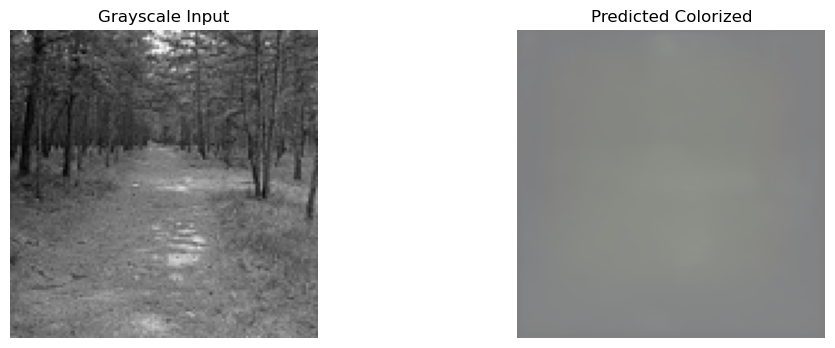

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


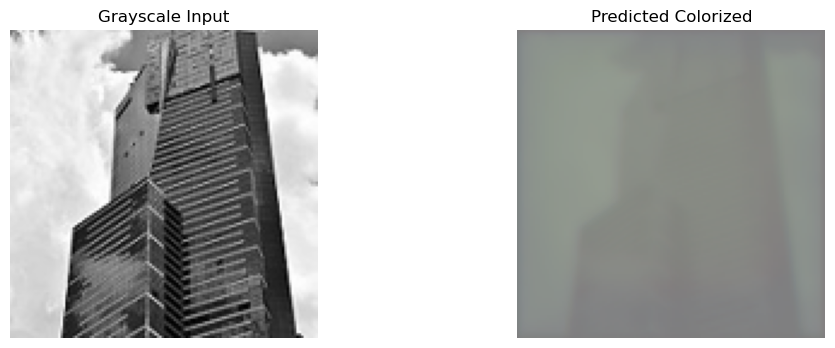

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


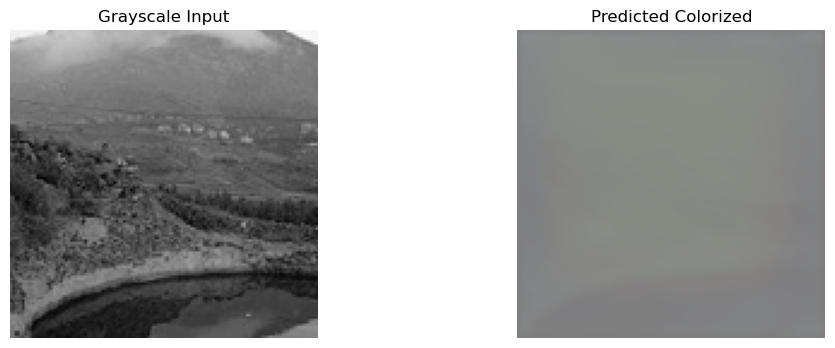

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


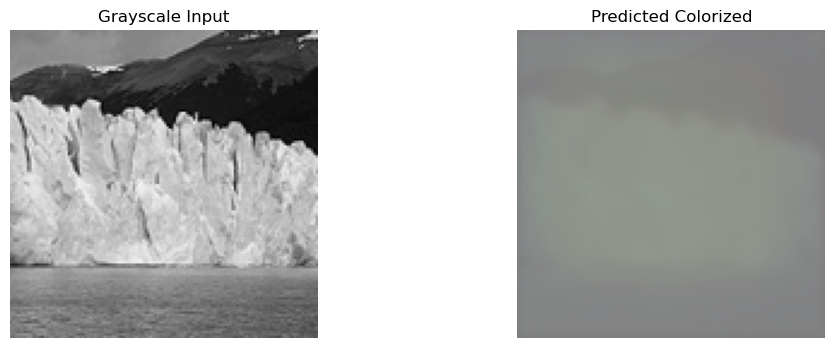

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


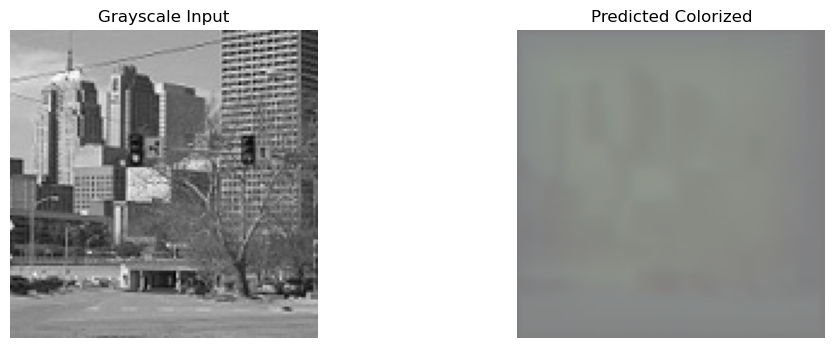

In [24]:

num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model_u_net.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

Sledeće funkcije su napravljene za lako učitavanje već istreniranih modela i predikciju fotografija 

In [25]:

def load_trained_model(model_path):
    """
    Loads a trained Keras model from a .h5 file.
    """
    model = load_model(model_path, compile=False)
    return model

def prepare_image_for_prediction(image_path, target_size=(128, 128)):
    """
    Loads a single image, converts to grayscale, resizes, normalizes, and adds batch/channel dimensions.
    Returns a numpy array ready for model prediction.
    """
    img = Image.open(image_path).convert("L")
    img = img.resize(target_size)
    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array[..., np.newaxis] 
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array  

def display_grayscale_and_colorized(grayscale_img, colorized_img):
    """
    Displays grayscale and colorized images side by side.
    grayscale_img: numpy array, shape (128, 128, 1) or (128, 128)
    colorized_img: numpy array, shape (128, 128, 3)
    """

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_img.squeeze(), cmap='gray')
    plt.title("Grayscale Input")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(colorized_img)
    plt.title("Predicted Colorized")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


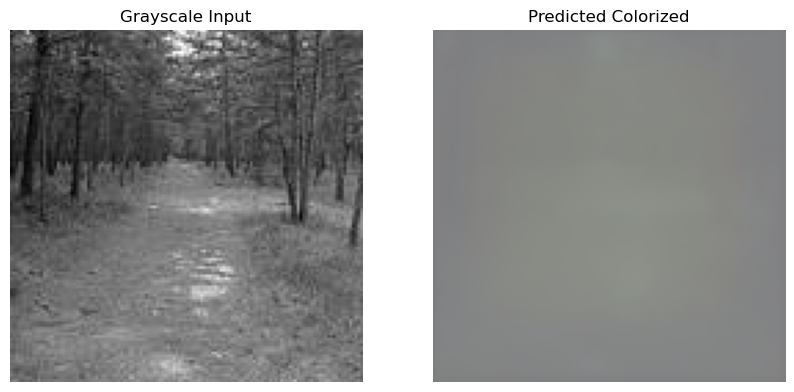

In [26]:
model = load_trained_model("colorization_model_u_net.h5")

input_img = prepare_image_for_prediction("Data/test_data_bw/20056_bw.jpg")

predicted_rgb = model.predict(input_img)[0]  
predicted_rgb = (predicted_rgb * 255).astype(np.uint8)  


display_grayscale_and_colorized(input_img[0], predicted_rgb)
